## **Snapdeal_projet_online_retail_customer_segmentation_using_k-means_clustring**

### **Objective**

### *Customer Segments for Online Retail with the use of K-means Clustering*

#### Here are the exact steps used for Customer Segmentation using K-Means clustering:

* **Import the Important Libraries**

* **Loading Data**

* **Import data from a excel file.**

* **Data Inspection**

* **Explore dataset structure and key attributes.**

* **Data Cleaning**

* **Check for missing values (NaN handling).**

* **Drop rows with missing values.**

* **Remove negative values (likely product returns).**

* **Feature Engineering**

* **Create new features:**

* **Frequency: Total number of transactions per customer.**

* **Amount: Total spending per customer.**

* **Applying K-Means Clustering**

* **Choose the optimal number of clusters using the Elbow Method.**

* **Run the K-Means algorithm on the processed data.**

* **Cluster Analysis**

* **Identify key characteristics of each customer segment.**

* **Interpret the results for business insights.**

## **Goal**

### Segmenting Customer by using k-means clustring

In [117]:
## Importing the Important libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs  # Import make_blobs
from sklearn.cluster import KMeans
from plotly.graph_objects import Sankey
from matplotlib import animation  # Import animation module
from IPython.display import HTML  # Ensure this is not indented
from collections import Counter
%matplotlib notebook
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import RocCurveDisplay  
!pip install yellowbrick;
import subprocess
import sys

subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'yellowbrick'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

0

In [118]:
## Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [119]:
## Data Display Customization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [120]:
# Parameters
n_points = 100  # Number of data points
n_features = 2  # Number of features (2D data for visualization)

# Parameters
n_samples = 300  # Number of data points
n_features = 2  # Number of features (2D data for visualization)
n_clusters = 3  # Number of clusters (groups)

In [121]:
# Generate random data
data = np.random.rand(n_points, n_features) * 100  # Values between 0 and 100

# Generate clustered data
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

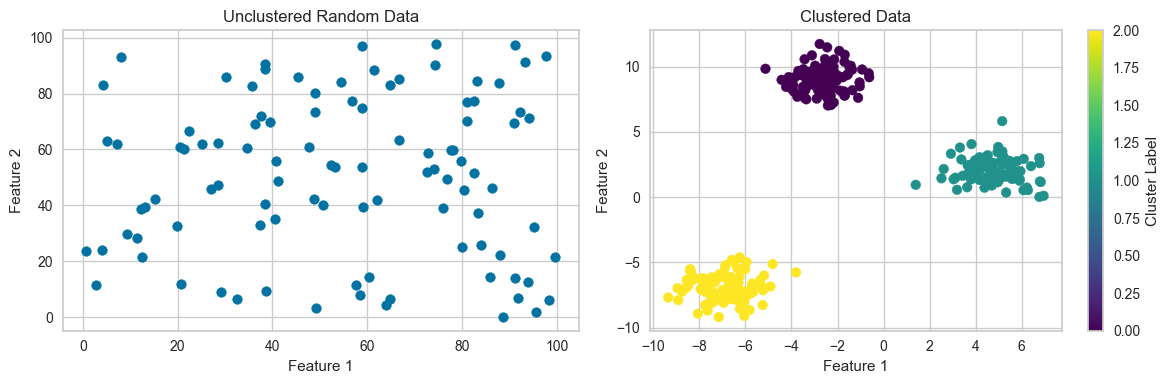

In [122]:
# Create a figure with 1 row and 2 columns for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Adjust the figsize as needed

# Plot the unclustered random data
axs[0].scatter(data[:, 0], data[:, 1])
axs[0].set_title("Unclustered Random Data")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")

# Plot the clustered data
scatter = axs[1].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axs[1].set_title("Clustered Data")
axs[1].set_xlabel("Feature 1")
axs[1].set_ylabel("Feature 2")

# Add a colorbar for the clustered data
plt.colorbar(scatter, ax=axs[1], label='Cluster Label')

# Adjust layout
plt.tight_layout()
plt.show()

### **steps fo k-means**
![Steps of K-Means](steps_of_k-means.png)

In [123]:
# Generate sample data
X, _ = make_blobs(n_samples=100, centers=3, random_state=42, cluster_std=1.5)

# Initialize K-Means
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, init='random', n_init=1, max_iter=1)  # Single iteration per update
centroids = np.random.randn(k, 2) * 5  # Random initialization

fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    global centroids
    ax.clear()  # Clear previous frame

    # Fit and predict clusters
    kmeans.cluster_centers_ = centroids
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_

    # Scatter plot of points with cluster colors
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="Set1", ax=ax, legend=False)

    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label="Centroids")
    
    ax.set_title(f"K-Means Clustering - Iteration {frame+1}")
    ax.legend()

# Create animation with 10 iterations
ani = animation.FuncAnimation(fig, update, frames=10, repeat=False, interval=1000)

# Display animation in Jupyter Notebook
HTML(ani.to_jshtml())  # Use this instead of plt.show()   

Customer Segmentation with k-Means

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. Case in point, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products or subscribe for a service; another group might include customers from non-profit organizations. A business task is to retain those customers.

### Loading And Reading data from the file

In [125]:
# Importing the dataframe
ravi = pd.read_excel('Online Retail.xlsx')

In [126]:
# Here is a snippet of the first 5 rows of the data frame:
ravi.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [127]:
ravi.shape

(541909, 8)

In [128]:
ravi.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [129]:
ravi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### **Cleaning Data**

In [130]:
# Check Unique Countries
ravi['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [131]:
ravi.isnull().values.any()

True

In [132]:
ravi.isnull().sum()*100/ravi.shape[0]

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [133]:
ravi = ravi.dropna()

In [134]:
ravi.isnull().sum()*100/ravi.shape[0]

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [135]:
# Dropping columns
ravi.drop(['StockCode', 'InvoiceDate','Description','Country'],axis = 1, inplace =True)

In [136]:
print(ravi["Quantity"].min())
print(ravi["UnitPrice"].min())

-80995
0.0


In [137]:
ravi['UnitPrice'].fillna(ravi['UnitPrice'].median(), inplace=True)
ravi['Quantity'].fillna(ravi['Quantity'].median(), inplace=True)

In [138]:
ravi.drop_duplicates(inplace=True)

#### Negative values probably mean that there were returns. This is important factor for e-commerce, but for this study let's keep only transactions without return (our goal is to introduce and compare different clustering methods).

In [139]:
df = ravi.loc[ravi["Quantity"] >0 ]
df = df.loc[df["UnitPrice"] >0 ]

In [140]:
print(df["Quantity"].min())
print(df["UnitPrice"].min())

1
0.001


In [141]:
# creating a new column of Total amount
df["Total"]=df["Quantity"]*df["UnitPrice"]

In [142]:
# Dropping 'Quantity' and 'UnitPrice'
df.drop(['Quantity', 'UnitPrice'],axis = 1, inplace =True)

In [143]:
# Checking data for the missing values
df.isnull().sum()

InvoiceNo     0
CustomerID    0
Total         0
dtype: int64

In [144]:
# Dropping the missing value in customerId .
df.dropna(axis = 0, inplace=True)

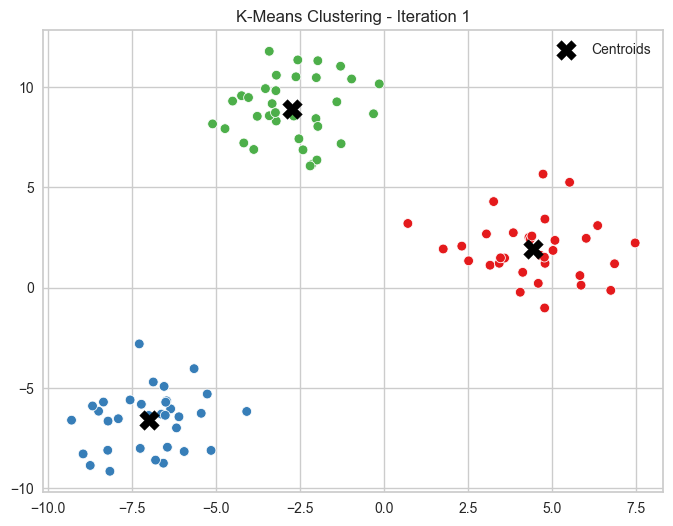

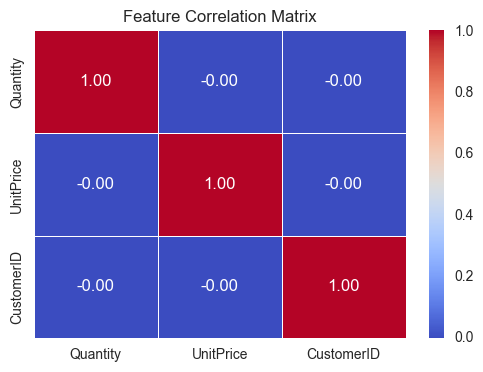

In [145]:
# Load the dataset
ravi = pd.read_excel('Online Retail.xlsx')

# Select only numeric columns for correlation
numeric_ravi = ravi.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_ravi.corr()

# Set up the figure size
plt.figure(figsize=(6, 4))

# Create a heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5)

# Add title
plt.title("Feature Correlation Matrix")

# Show the plot
plt.show()

**Creating new features:**

* **Frequency**: total number of transactions

* **Amount**: total amount of transactions

In [146]:
# Amount
Amount = df.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns=['CustomerID','Amount']

#frequency
Frequency=df.groupby('CustomerID')['InvoiceNo'].count()
Frequency=Frequency.reset_index()
Frequency.columns=['CustomerID','Frequency']

# merge both df
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')
df1.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,3125.98,116
2,12348.0,1399.80,20
3,12349.0,1209.49,45
4,12350.0,174.20,9


In [147]:
# Dropping 'CustomerID'
df1.drop(['CustomerID'],axis = 1, inplace =True)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


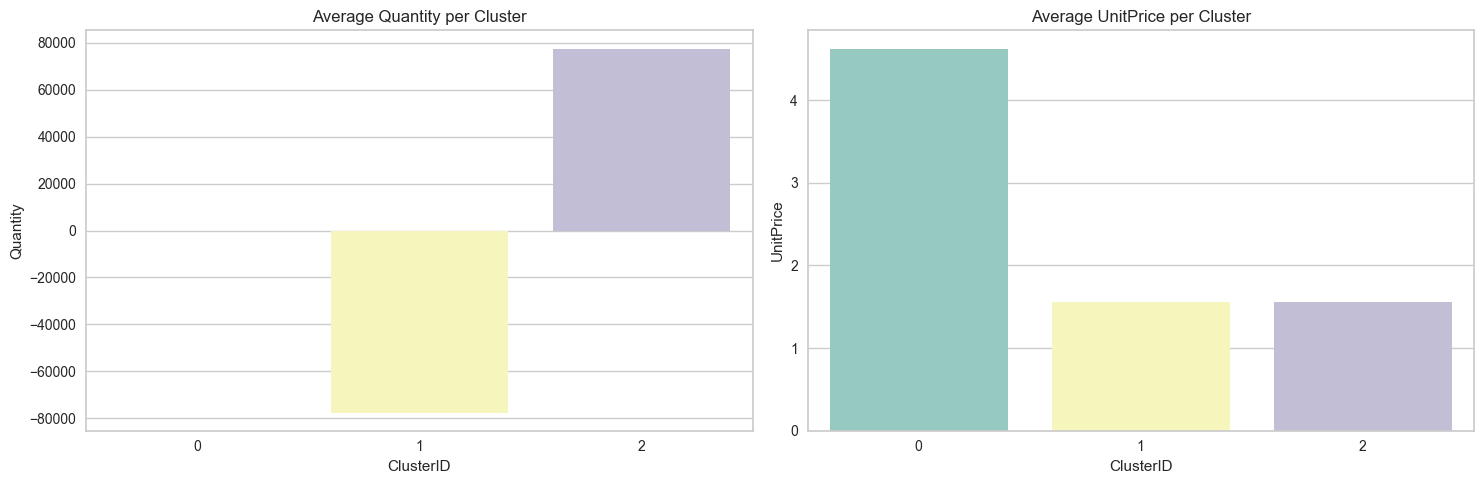

In [148]:
# Check the columns
print(ravi.columns)

# Strip any leading/trailing spaces from column names
ravi.columns = ravi.columns.str.strip()

# Select features for clustering
features = ravi[['Quantity', 'UnitPrice']].dropna()  # Adjust if necessary

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # You can choose the number of clusters
ravi['ClusterID'] = kmeans.fit_predict(features)

# Now you can group by the new ClusterID
cluster_summary = ravi.groupby('ClusterID').agg({
    'Quantity': 'mean', 
    'UnitPrice': 'mean'
}).reset_index()

# Plot the bar plots for the aggregated data
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for mean Quantity per Cluster
sns.barplot(x='ClusterID', y='Quantity', data=cluster_summary, ax=axs[0], palette='Set3')
axs[0].set_title("Average Quantity per Cluster")

# Bar plot for mean UnitPrice per Cluster
sns.barplot(x='ClusterID', y='UnitPrice', data=cluster_summary, ax=axs[1], palette='Set3')
axs[1].set_title("Average UnitPrice per Cluster")

plt.tight_layout()
plt.show()

This code performs KMeans clustering on Quantity and UnitPrice in an online retail dataset. It then visualizes the clustering results in a 2x3 grid of scatter plots, each representing one of the clusters. Each plot shows how the Quantity and UnitPrice values are distributed within the respective clusters, with distinct colors representing different clusters. If any cluster has no data, it will be marked as "No Data."

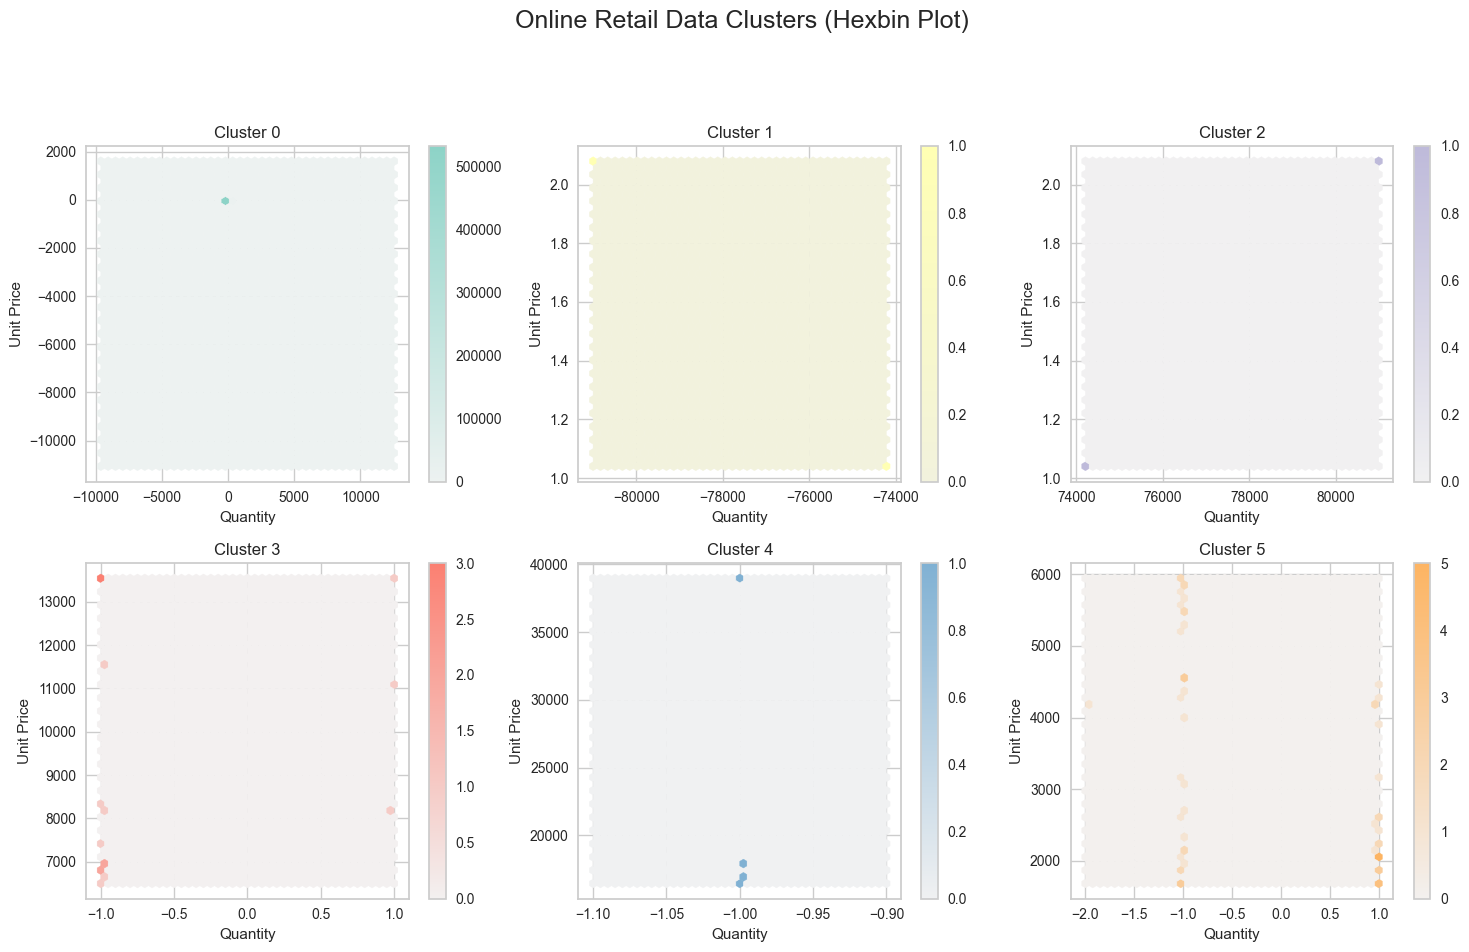

In [149]:
# Select features for clustering
features = ravi[['Quantity', 'UnitPrice']].dropna()

# Apply KMeans clustering
n_clusters = 6  # You can choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
ravi['ClusterID'] = kmeans.fit_predict(features)

# Create a color mapping for clusters
color_map = sns.color_palette("Set3", n_colors=n_clusters)

# Create a grid of hexbin plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Online Retail Data Clusters (Hexbin Plot)\n', size=18)

# Hexbin plot for each cluster
for cluster_id in range(n_clusters):
    cluster_data = ravi[ravi['ClusterID'] == cluster_id]
    
    # Determine the position in the grid
    row = cluster_id // 3
    col = cluster_id % 3

    if not cluster_data.empty:  # Check if the cluster data is not empty
        hb = axes[row, col].hexbin(cluster_data['Quantity'], cluster_data['UnitPrice'], 
                                   gridsize=40, cmap=sns.light_palette(color_map[cluster_id], as_cmap=True))
        axes[row, col].set_title(f"Cluster {cluster_id}")
        axes[row, col].set_xlabel("Quantity")
        axes[row, col].set_ylabel("Unit Price")
        fig.colorbar(hb, ax=axes[row, col])  # Add colorbar
    else:
        axes[row, col].set_title(f"Cluster {cluster_id} (No Data)")
        axes[row, col].set_xlabel("Quantity")
        axes[row, col].set_ylabel("Unit Price")

# Hide any unused subplots
for i in range(len(ravi['ClusterID'].unique()), 6):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

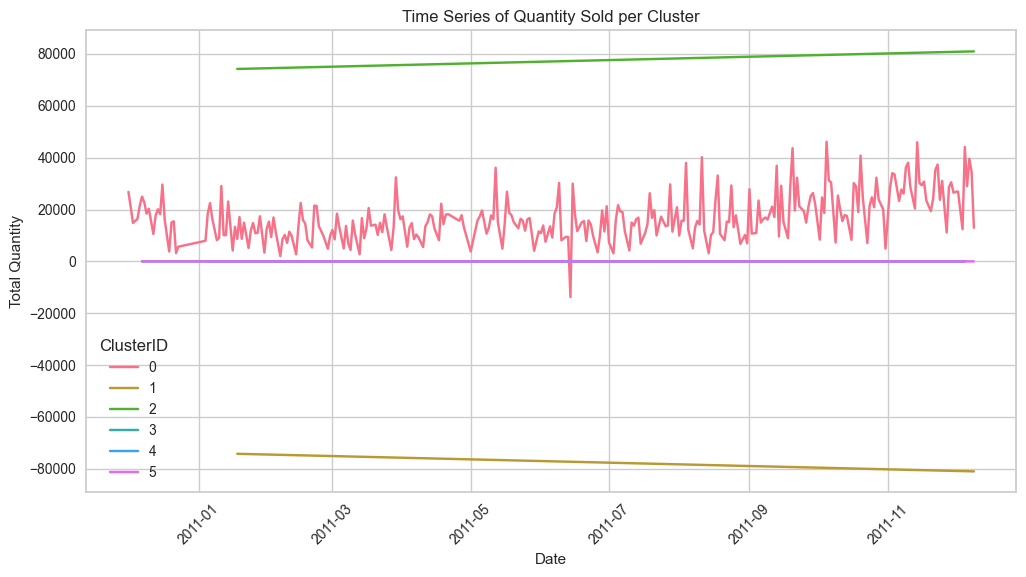

In [150]:
# Convert InvoiceDate to datetime
ravi['InvoiceDate'] = pd.to_datetime(ravi['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')

# Aggregate data by date for time series analysis
ravi['Date'] = ravi['InvoiceDate'].dt.date
ravi_grouped = ravi.groupby(['Date', 'ClusterID'])['Quantity'].sum().reset_index()

# Define color palette
palette = sns.color_palette("husl", n_colors=ravi['ClusterID'].nunique())

# Plot time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=ravi_grouped, x='Date', y='Quantity', hue='ClusterID', palette=palette)
plt.title('Time Series of Quantity Sold per Cluster')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend(title='ClusterID')
plt.xticks(rotation=45)
plt.show()

### ***RFM***

#### Extracting 
* R - (Recency)
* F - (Frequency)
* M - (Monetary)
#### columns form the data.

In [151]:
# RFM implementation

# Extracting amount by multiplying quantity and unit price and saving the data into amount variable.
ravi["Amount"]  =ravi.Quantity * ravi.UnitPrice

Monetary Value

In [152]:
# Finding total amount spent per customer

monetary = ravi.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [153]:
# Getting the count of orders made by each customer based on customer ID.

frequency = ravi.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


Merging Amount and Frequency columns

In [154]:
# Creating master dataset

master = monetary.merge(frequency, on = "CustomerID", how = "inner")
master.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [155]:
# Finding max data

maximum = max(ravi.InvoiceDate)

In [156]:
# Convert to datetime format
maximum = pd.to_datetime(maximum)

# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days = 1)

In [157]:
# Convert 'InvoiceDate' to datetime with the correct format
ravi['InvoiceDate'] = pd.to_datetime(ravi['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')

# Ensure 'maximum' is also in datetime format
maximum = pd.to_datetime(maximum)

# Now, perform the subtraction
ravi['diff'] = maximum - ravi['InvoiceDate']

# Display the first few rows to check results
print(ravi.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  ClusterID  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          0   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          0   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          0   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          0   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          0   

         Date  Amount              diff  
0  2010-12-01   15.30 374 days 04:24:00  
1  2010-12-01   20.34 374 days 0

In [158]:
# Dataframe merging by Recency

# Group by 'CustomerID' and find the minimum value of the 'diff' column
recency = ravi.groupby('CustomerID')['diff'].min()

# Reset index to convert from Series to DataFrame
recency = recency.reset_index()

# Display first few rows
recency.head()

,CustomerID,diff
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [159]:
# Combining all Recency, Frequency and Monetary parameters

RFM = master.merge(recency, on = "CustomerID")
RFM.columns = ['CustomerID','Amount','Frequency','Recency']
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00


In [160]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  4372 non-null   float64        
 1   Amount      4372 non-null   float64        
 2   Frequency   4372 non-null   int64          
 3   Recency     4372 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 136.8 KB


In [161]:
df1.describe(include='all')

,Amount,Frequency
count,4338.000000,4338.000000
mean,1533.648595,57.018442
std,6987.797061,129.304960
min,3.750000,1.000000
25%,221.825000,12.000000
50%,495.930000,27.500000
75%,1188.825000,63.000000
max,202359.830000,4258.000000


Outlier detection model selection

Distribution is not normal Distribution is highly skewed We have huge outliers Isolation Forest does not assume normal distribution and is able to detect outliers at a multi-dimensional level. Isolation Forest is also computationally efficient. The algorithm is based on the principle that anomalies are observations that are few and different, this should make them easier to identify. That's why I choose Isolation Forest.

In [162]:
from sklearn.ensemble import IsolationForest
df2 = df1.copy()

****In git account, few plot are not working, then we can see that Output****

In [163]:
# Model building
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df2)

IsolationForest(contamination=0.1, n_estimators=150)

In [164]:
IsolationForest(contamination=0.1, n_estimators=150)

IsolationForest(contamination=0.1, n_estimators=150)

In [165]:
# Adding 'scores' and 'anomaly' colums to df
scores=model.decision_function(df2)
anomaly=model.predict(df2)

df2['scores']=scores
df2['anomaly']=anomaly

anomaly = df2.loc[df2['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 434


In [166]:
# Dropping Outliers
df2 = df2.drop(anomaly_index, axis = 0).reset_index(drop=True)

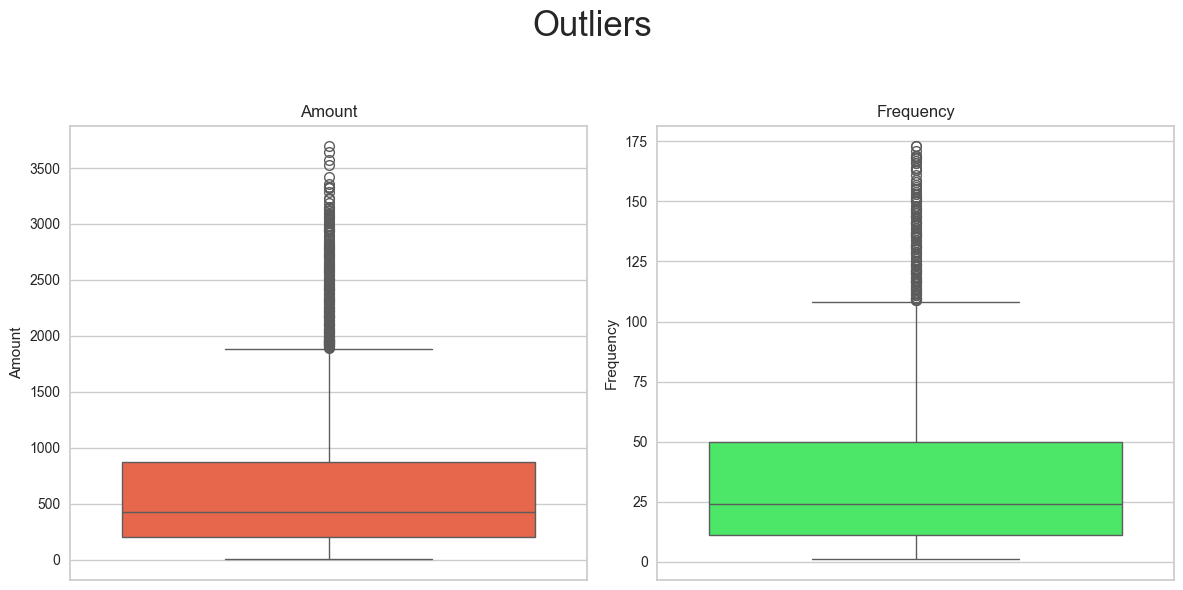

In [167]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Outliers\n', size=25)

# Box plot for Amount with a bright color
sns.boxplot(ax=axes[0], data=df2['Amount'], color='#FF5733')  # Bright red color
axes[0].set_title("Amount")

# Box plot for Frequency with a different bright color
sns.boxplot(ax=axes[1], data=df2['Frequency'], color='#33FF57')  # Bright green color
axes[1].set_title("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

In [168]:
# Dropping columns that we don't need any more
df2.drop(['scores', 'anomaly'], axis = 1, inplace =True)

In [169]:
# Outlier treatment for Amount

Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

In [170]:
# Outlier treatment for Frequency

Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

In [171]:
# Outlier treatment for Recency

Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

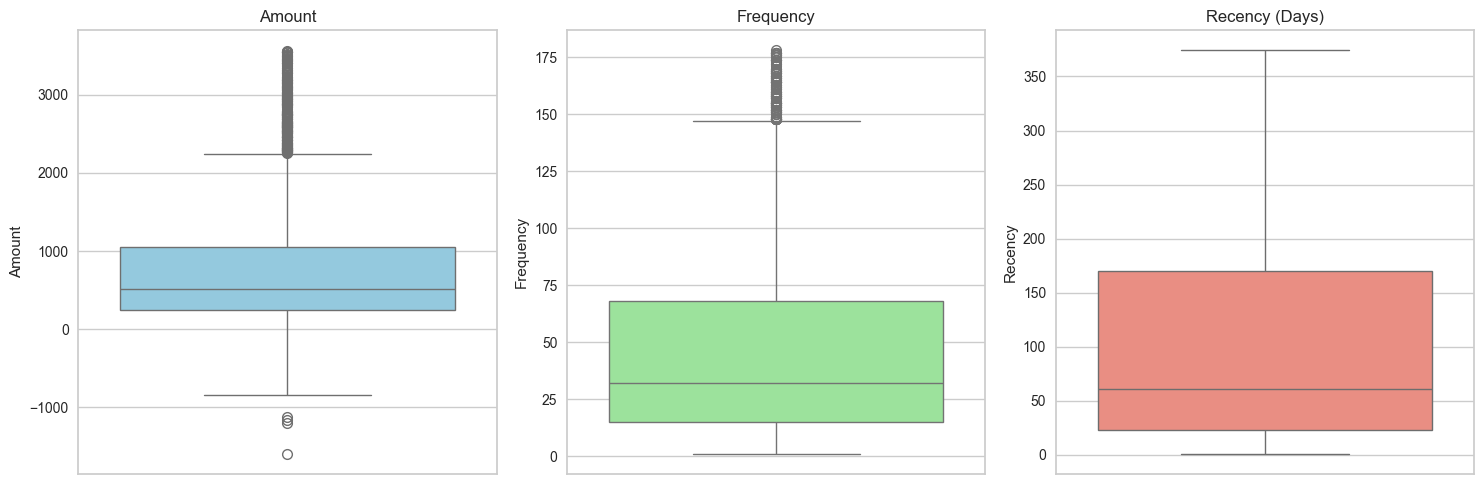

In [172]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define custom colors for each boxplot
colors = ['skyblue', 'lightgreen', 'salmon']

# Boxplots with different colors
sns.boxplot(y=RFM.Amount, ax=axs[0], color=colors[0])
axs[0].set_title("Amount", fontsize=12)

sns.boxplot(y=RFM.Frequency, ax=axs[1], color=colors[1])
axs[1].set_title("Frequency", fontsize=12)

sns.boxplot(y=RFM.Recency.dt.days, ax=axs[2], color=colors[2])
axs[2].set_title("Recency (Days)", fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

In [173]:
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
5,12352.0,1545.41,95,36 days 22:13:00


*Scaling the RFM data*

In [174]:
# Standardise all parameters
RFM_norm1 = RFM.drop("CustomerID", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [175]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


### **Hopkins Statistics:**

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

* If the value is between {0.01, ...,0.3}, the data is regularly spaced.

* If the value is around 0.5, it is random.

* If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [176]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [177]:
hopkins(RFM_norm1)

0.8978158421858957

K-Means with some K

In [178]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

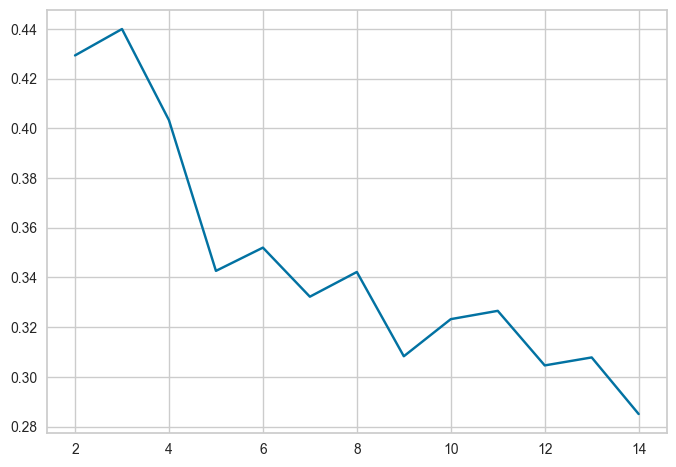

In [179]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
plt.show()

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3=scaler.fit_transform(df2)

* Determining The Optimal Number Of Clusters

* Selecting optimal number of clusters is key to applying clustering algorithm to the dataset, such as k-means clustering, which requires the user to specify the number of clusters k to be generated. This is a somewhat arbitrary procedure, one of the weakest aspects of performing cluster analysis.

* The major difference between elbow and silhouette method is that elbow only calculates the euclidean distance whereas silhouette takes into account variables such as variance, skewness, high-low differences, etc.

* Both the Elbow method / SSE Plot and the Silhouette method can be used interchangeably based on the details presented by the plots.

In [181]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)  # Assuming 'data' is your DataFrame

### ** Elbow Method**

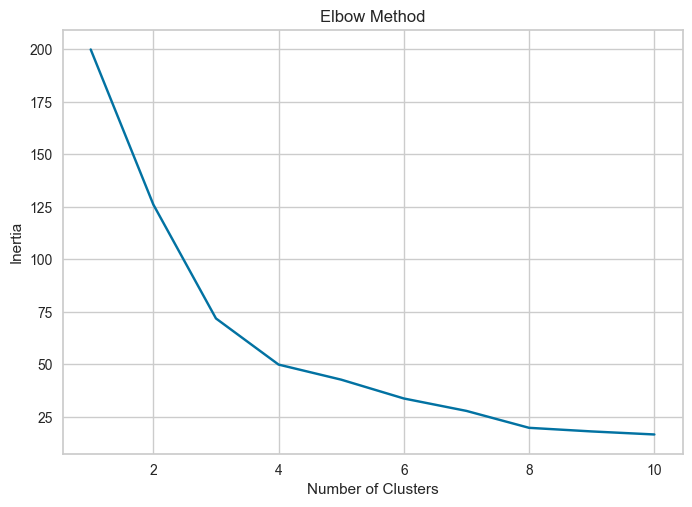

In [182]:
# Elbow Method to find optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

**Sum of Squared Distances**

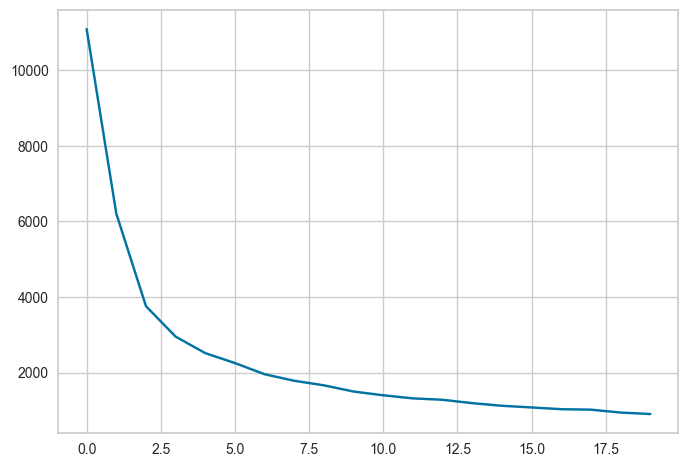

In [183]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

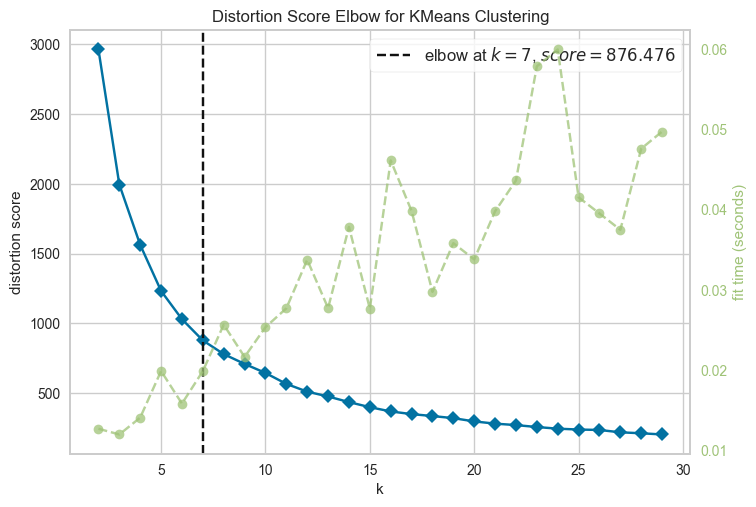

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [184]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df3)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [185]:
ravi = pd.read_excel('Online Retail.xlsx')
# Calculate 'Total Amount Spent'
ravi['Total Amount Spent'] = ravi['Quantity'] * ravi['UnitPrice']

# Prepare the data (using 'Total Amount Spent' and 'Quantity' for clustering)
ravi_new = ravi[['Total Amount Spent', 'Quantity']].dropna()

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(ravi_new)

# Predict the clusters
ravi_new['Cluster'] = kmeans.predict(ravi_new)

# Display the first few rows
print(ravi_new.head())

   Total Amount Spent  Quantity  Cluster
0               15.30         6        0
1               20.34         6        0
2               22.00         8        0
3               20.34         6        0
4               20.34         6        0


In [186]:
kmeans.cluster_centers_

array([[ 1.84411737e+01,  9.83869926e+00],
       [-1.22826600e+05, -7.76050000e+04]])

In [187]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

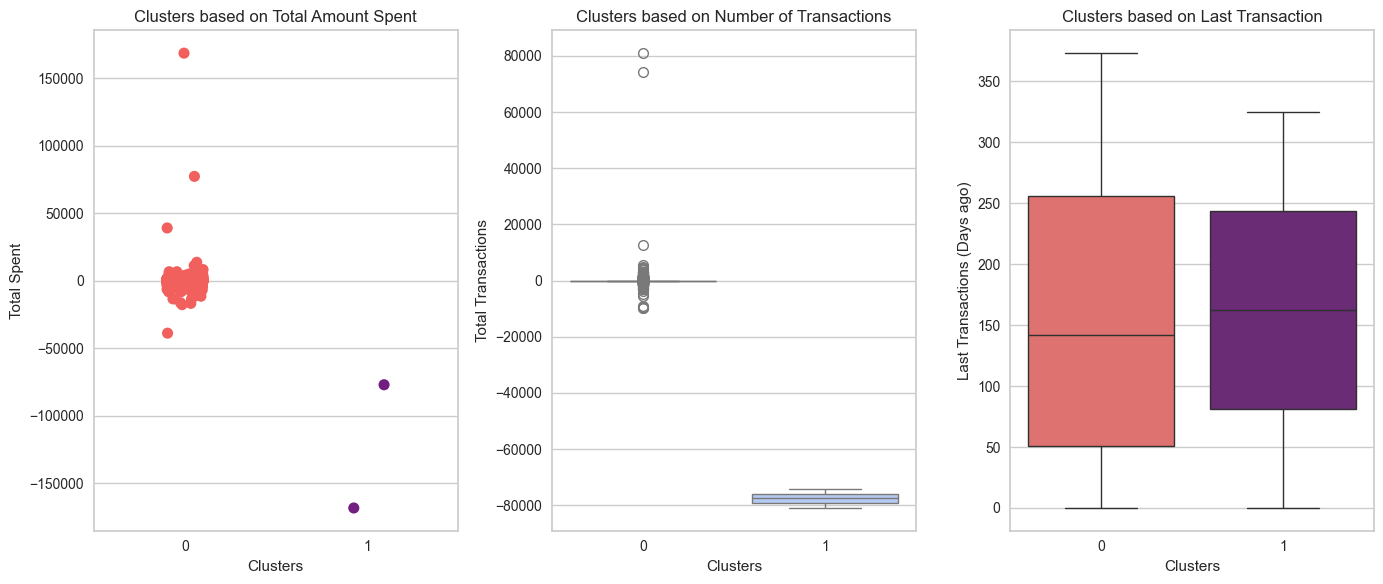

In [188]:
# Step 1: Load the data
ravi = pd.read_excel('Online Retail.xlsx')

# Step 2: Calculate 'Total Amount Spent'
ravi['Total Amount Spent'] = ravi['Quantity'] * ravi['UnitPrice']

# Step 3: Prepare the data (drop rows with missing values)
ravi_new = ravi[['Total Amount Spent', 'Quantity']].dropna()

# Step 4: Fit KMeans and predict clusters
kmeans = KMeans(n_clusters=2, random_state=42)
ravi_new['pred'] = kmeans.fit_predict(ravi_new)

# Step 5: Create visualizations
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

# Strip plot for Total Amount Spent
sns.stripplot(x='pred', y='Total Amount Spent', data=ravi_new, s=8, ax=ax[0], palette='magma_r')
ax[0].set_title('Clusters based on Total Amount Spent')
ax[0].set_ylabel('Total Spent')
ax[0].set_xlabel('Clusters')

# Box plot for Number of Transactions
sns.boxplot(x='pred', y='Quantity', data=ravi_new, ax=ax[1], palette='coolwarm_r')
ax[1].set_title('Clusters based on Number of Transactions')
ax[1].set_ylabel('Total Transactions')
ax[1].set_xlabel('Clusters')

# Step 6: Calculate Last Transaction (Days since last purchase)
# Specify the correct format for the InvoiceDate
ravi['InvoiceDate'] = pd.to_datetime(ravi['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')  # Use the correct format
ravi['Last_transact'] = (ravi['InvoiceDate'].max() - ravi['InvoiceDate']).dt.days
ravi_new['Last_transact'] = ravi['Last_transact']

# Box plot for Last Transaction
sns.boxplot(x='pred', y='Last_transact', data=ravi_new, ax=ax[2], palette='magma_r')
ax[2].set_title('Clusters based on Last Transaction')
ax[2].set_ylabel('Last Transactions (Days ago)')
ax[2].set_xlabel('Clusters')

# Show the plots
plt.tight_layout()
plt.show()

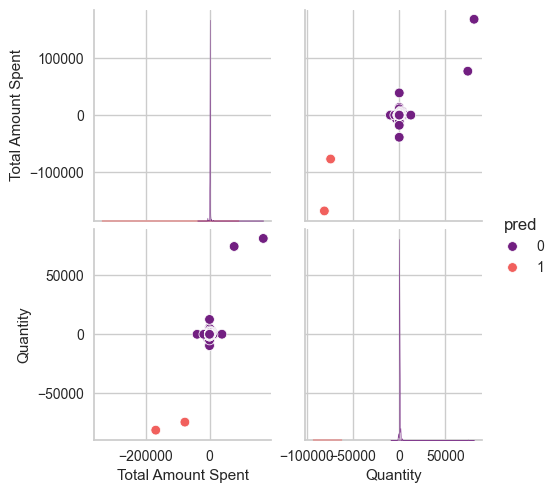

In [189]:
# Step 1: Load the data
ravi = pd.read_excel('Online Retail.xlsx')

# Step 2: Calculate 'Total Amount Spent'
ravi['Total Amount Spent'] = ravi['Quantity'] * ravi['UnitPrice']

# Step 3: Prepare the data (drop rows with missing values)
ravi_new = ravi[['Total Amount Spent', 'Quantity']].dropna()

# Step 4: Fit KMeans and predict clusters
kmeans = KMeans(n_clusters=2, random_state=42)
ravi_new['pred'] = kmeans.fit_predict(ravi_new)

# Step 5: Create a pair plot
pair_plot = sns.pairplot(ravi_new, hue='pred', diag_kind='kde', palette='magma')

# Show the plot
plt.show()

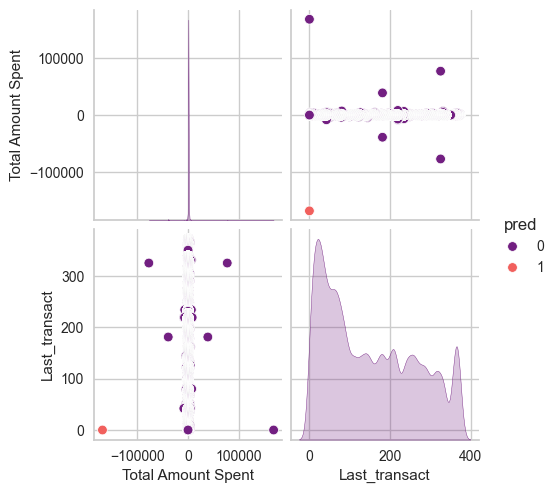

In [190]:
# Step 1: Load the data
ravi = pd.read_excel('Online Retail.xlsx')

# Step 2: Calculate 'Total Amount Spent'
ravi['Total Amount Spent'] = ravi['Quantity'] * ravi['UnitPrice']

# Step 3: Convert 'InvoiceDate' to datetime and calculate 'Last_transact'
ravi['InvoiceDate'] = pd.to_datetime(ravi['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')
ravi['Last_transact'] = (ravi['InvoiceDate'].max() - ravi['InvoiceDate']).dt.days

# Step 4: Select relevant numeric columns and drop rows with missing values
ravi_new = ravi[['CustomerID', 'Total Amount Spent', 'InvoiceNo', 'Last_transact']].dropna()

# Step 5: Fit KMeans and predict clusters using only numeric columns
kmeans = KMeans(n_clusters=2, random_state=42)
ravi_new['pred'] = kmeans.fit_predict(ravi_new[['Total Amount Spent', 'Last_transact',]])

# Step 6: Create a pair plot for the specified columns
pair_plot = sns.pairplot(ravi_new, hue='pred', diag_kind='kde', palette='magma', 
                         vars=['Total Amount Spent', 'Last_transact'])

# Step 7: Show the plot
plt.show()

# Optional: Save the plot as an image file
pair_plot.savefig("pairplot_customer_analysis.png")  # Save the figure

Silhouette Analysis

                                                            p-q
                  silhouette score=p−q silhouette score = _________
                                                           max(p,q)


* $p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

* $q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1.

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [191]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(df3)
# Calculate Silhoutte Score
score = silhouette_score(df3, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.470


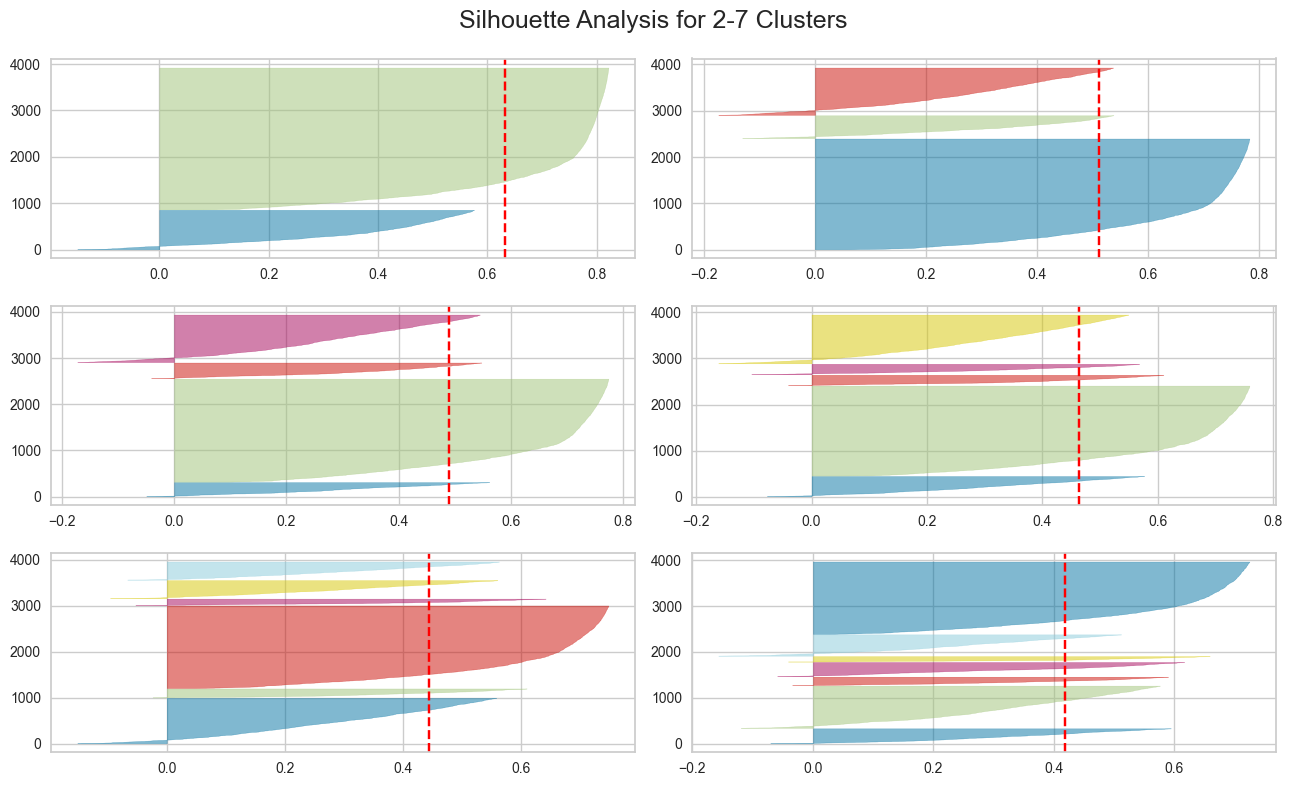

In [192]:
from yellowbrick.cluster import SilhouetteVisualizer

# Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier.
# You can find the code to simply create Silhouette visualisation for K-Means clusters with n_cluster as 2, 3, 4, 5, 6, 7 below.

fig, ax = plt.subplots(3, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-7 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df3)

plt.show()

The choice here is not so obvious due to the following reasons:

Presence of clusters with below average silhouette scores for 5-7 clusters. Wide fluctuations in the size of the silhouette plots. The fluctuation in size is not similar, but better for 6 and 7 clusters. The thickness of the silhouette plot representing each cluster also is a deciding point. Unfortunately we have one cluster which is significantly thicker than the others.

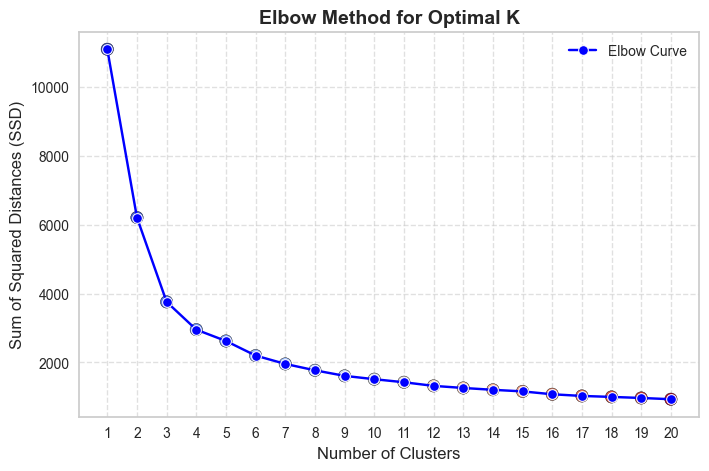

In [193]:
# Sum of squared distances (SSD) calculation
ssd = []
for num_clusters in range(1, 21):  # Iterating from 1 to 20 clusters
    model_clus = KMeans(n_clusters=num_clusters, max_iter=100, random_state=42)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)  # Inertia gives SSD

# Create figure
plt.figure(figsize=(8, 5))

# Use different colors for the line and markers
sns.lineplot(x=range(1, 21), y=ssd, marker='o', linestyle='-', color='blue', label="Elbow Curve")
plt.scatter(range(1, 21), ssd, c=range(1, 21), cmap='coolwarm', edgecolors='black', s=80)  # Colored points

# Customize labels and title
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Sum of Squared Distances (SSD)", fontsize=12)
plt.title("Elbow Method for Optimal K", fontsize=14, fontweight='bold')

# Add grid and ticks
plt.xticks(range(1, 21))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

****In git account, few plot are not working, then we can see that output****

In [194]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(RFM_norm1)

KMeans(max_iter=50, n_clusters=5)

In [195]:
# Analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency', 'ClusterID']
RFM_km.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,326 days 02:33:00,3
1,12348.0,1797.24,31,75 days 23:37:00,2
2,12349.0,1757.55,73,19 days 02:59:00,2
3,12350.0,334.40,17,310 days 20:49:00,3
4,12352.0,1545.41,95,36 days 22:13:00,2


In [196]:
RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [197]:
ravi = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
ravi.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
ravi.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,862.533111,113.750000,54.786111
1,1,374.079790,23.945736,57.206483
2,2,1286.293179,56.252648,48.750378
3,3,329.339868,20.469298,262.085526
4,4,2492.175307,120.913043,38.695652


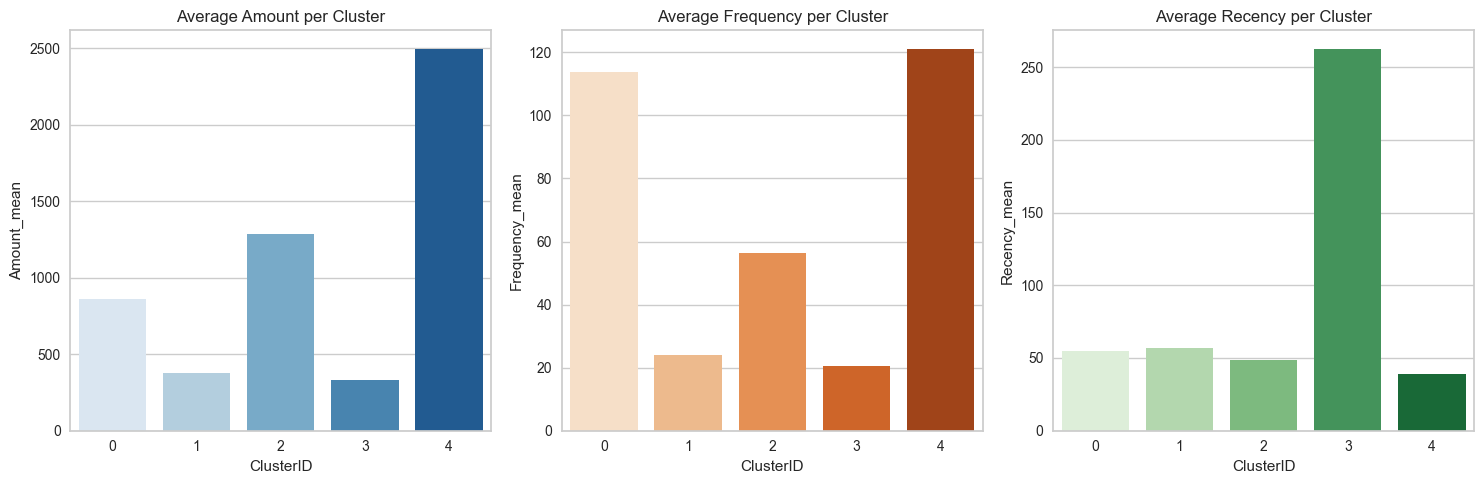

In [198]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar plots with different palettes
sns.barplot(x=ravi.ClusterID, y=ravi.Amount_mean, ax=axs[0], palette='Blues')
axs[0].set_title("Average Amount per Cluster", fontsize=12)

sns.barplot(x=ravi.ClusterID, y=ravi.Frequency_mean, ax=axs[1], palette='Oranges')
axs[1].set_title("Average Frequency per Cluster", fontsize=12)

sns.barplot(x=ravi.ClusterID, y=ravi.Recency_mean, ax=axs[2], palette='Greens')
axs[2].set_title("Average Recency per Cluster", fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

Inferences
On RFM analysis it was found that Customers with Cluster ID 4 are the best and loyal customers.
Cluster Id 3 are customers who are not interested in retail store.
People with cluster ID 0,1,2 needs targeted marketing marketing based on their demographics, buying pattern etc.

Training the K-Means model on the datasets

In [199]:
# Load the main DataFrame
ravi = pd.read_excel('Online Retail.xlsx')

# Define other DataFrames with example data
dart_df = pd.DataFrame({'Column1': [1, 2, 3], 'Column2': ['A', 'B', 'C']})
basic2_df = pd.DataFrame({'Column1': [4, 5, 6], 'Column2': ['D', 'E', 'F']})
outliers_df = pd.DataFrame({'Column1': [7, 8, 9], 'Column2': ['G', 'H', 'I']})
spiral2_df = pd.DataFrame({'Column1': [10, 11, 12], 'Column2': ['J', 'K', 'L']})
boxes3_df = pd.DataFrame({'Column1': [13, 14, 15], 'Column2': ['M', 'N', 'O']})

# Create copies of the DataFrames
df_kmeans = df3.copy()  # Ensure df3 is defined
df_blob_kmeans = ravi.copy()
df_dart_kmeans = dart_df.copy()
df_basic_kmeans = basic2_df.copy()
df_outliers_kmeans = outliers_df.copy()
df_spiral2_kmeans = spiral2_df.copy()
df_boxes3_kmeans = boxes3_df.copy()

In [200]:
# Copying data sets
df_kmeans = df3.copy()
df_blob_kmeans = ravi.copy()
df_dart_kmeans = dart_df.copy()
df_basic_kmeans = basic2_df.copy()
df_outliers_kmeans = outliers_df.copy()
df_spiral2_kmeans = spiral2_df.copy()
df_boxes3_kmeans = boxes3_df.copy()

In [201]:
# Check if 'color' exists in each DataFrame
for df in [df_blob_kmeans, df_dart_kmeans, df_basic_kmeans, df_outliers_kmeans, df_spiral2_kmeans, df_boxes3_kmeans]:
    print(df.columns)

# Drop 'color' column if it exists, without raising an error if it doesn't
df_blob_kmeans.drop(['color'], axis=1, inplace=True, errors='ignore')
df_dart_kmeans.drop(['color'], axis=1, inplace=True, errors='ignore')
df_basic_kmeans.drop(['color'], axis=1, inplace=True, errors='ignore')
df_outliers_kmeans.drop(['color'], axis=1, inplace=True, errors='ignore')
df_spiral2_kmeans.drop(['color'], axis=1, inplace=True, errors='ignore')
df_boxes3_kmeans.drop(['color'], axis=1, inplace=True, errors='ignore')

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
Index(['Column1', 'Column2'], dtype='object')
Index(['Column1', 'Column2'], dtype='object')
Index(['Column1', 'Column2'], dtype='object')
Index(['Column1', 'Column2'], dtype='object')
Index(['Column1', 'Column2'], dtype='object')


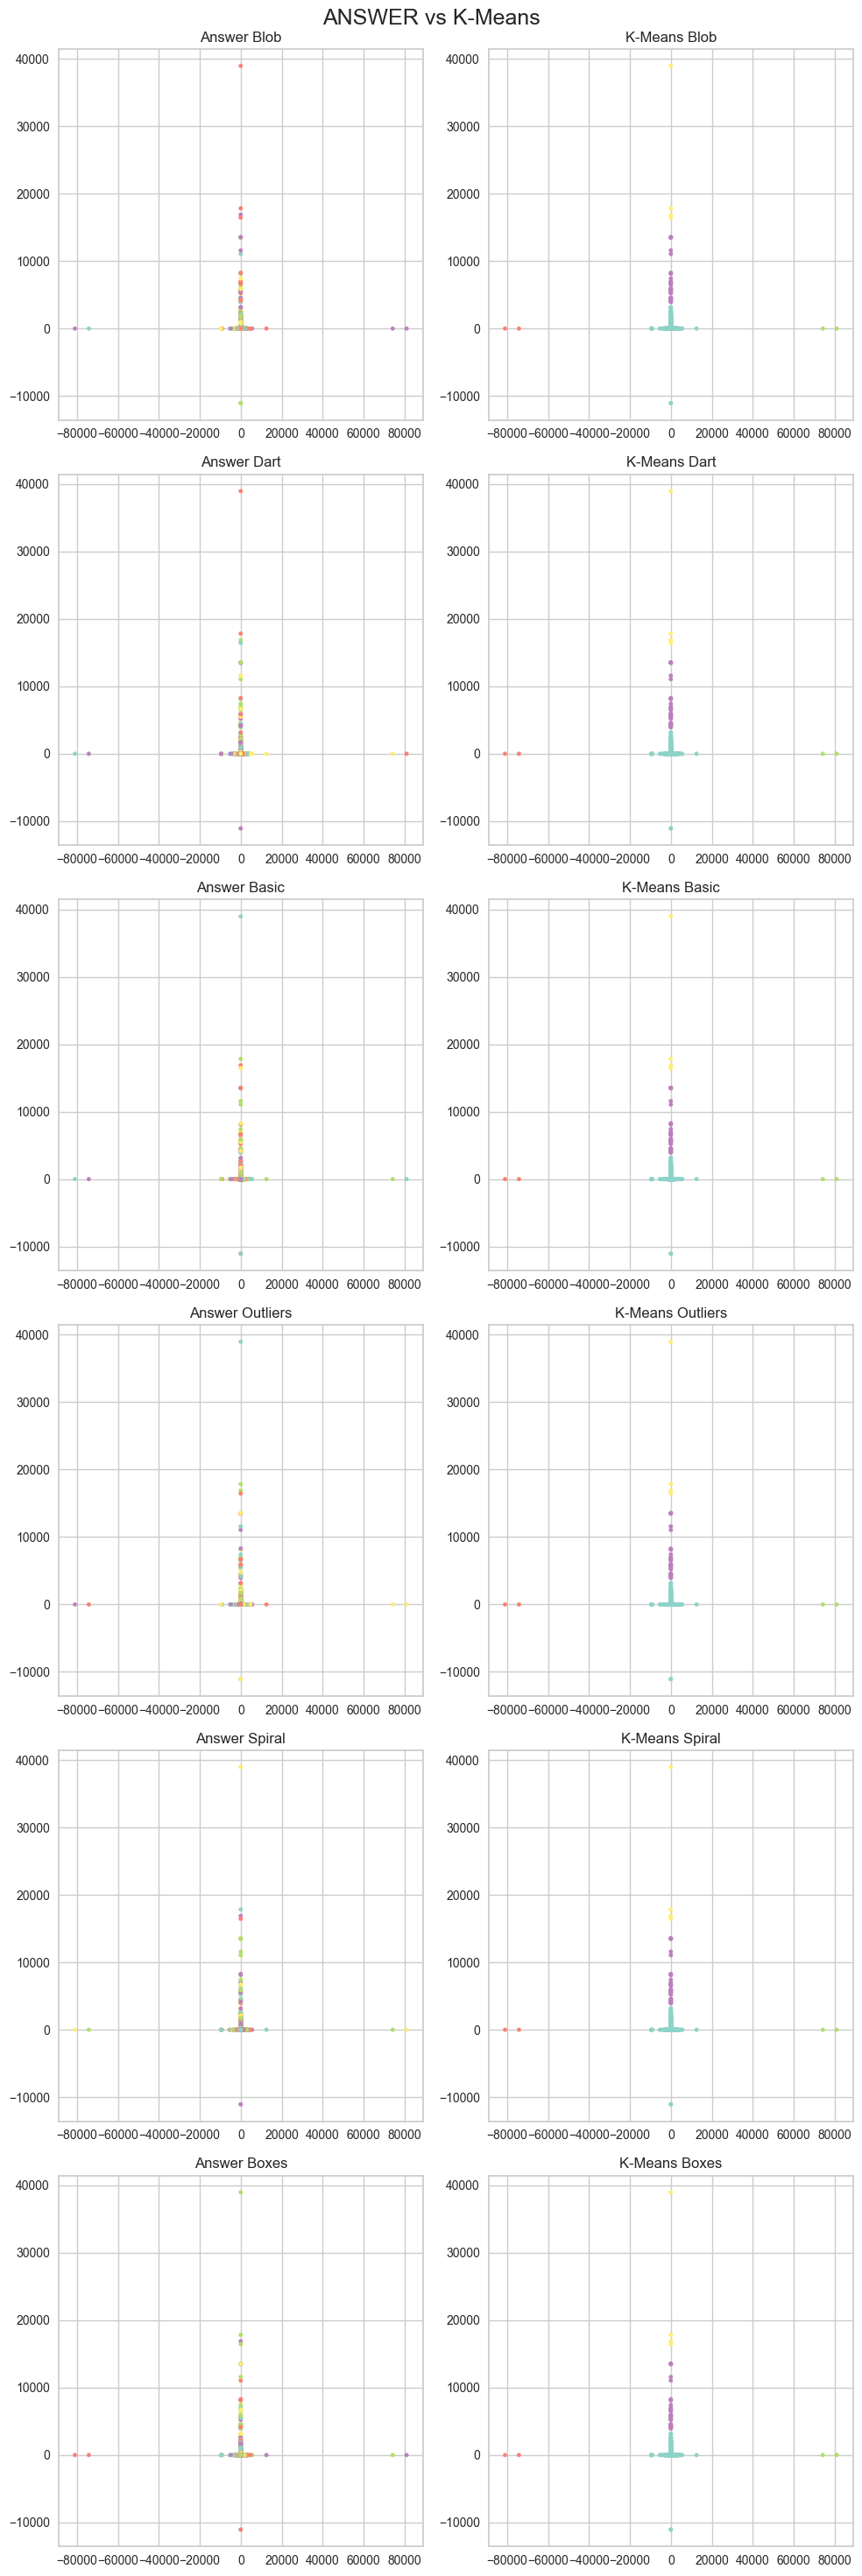

In [202]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
ravi['Cluster'] = kmeans.fit_predict(ravi[['Quantity', 'UnitPrice']])

# Create synthetic DataFrames for demonstration
dataframes = {
    "Blob": ravi.copy(),
    "Dart": ravi.copy(),
    "Basic": ravi.copy(),
    "Outliers": ravi.copy(),
    "Spiral": ravi.copy(),
    "Boxes": ravi.copy()
}

# Assign random colors for demonstration
for df in dataframes.values():
    df['color'] = np.random.randint(0, 5, size=len(df))

# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 30))
fig.suptitle('ANSWER vs K-Means\n', size=18)

# Plotting each subplot
for i, (title, df) in enumerate(dataframes.items()):
    # Scatter plot for random colors
    axes[i, 0].scatter(df['Quantity'], df['UnitPrice'], c=df['color'], s=10, cmap="Set3")
    axes[i, 0].set_title(f"Answer {title}")
    
    # Scatter plot for K-Means clustering
    axes[i, 1].scatter(df['Quantity'], df['UnitPrice'], c=df['Cluster'], s=10, cmap="Set3")
    axes[i, 1].set_title(f"K-Means {title}")

# Adjust layout
plt.tight_layout()
plt.show()

In [203]:
# We called the df, that's why we need to refer to previous df to add cluster numbers
# Assuming you have performed KMeans clustering and have the cluster labels
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(ravi[['Quantity', 'UnitPrice']])

# Create df2 as a copy of ravi or any other DataFrame you want to use
df2 = ravi.copy()  # or load from a Excel or other source

# Create df_kmeans and add the cluster numbers
df_kmeans = df2.copy()
df_kmeans['Cluster'] = y_kmeans

# Check the number of items in each cluster
print(df_kmeans['Cluster'].value_counts())

Cluster
0    541862
3        39
4         4
2         2
1         2
Name: count, dtype: int64


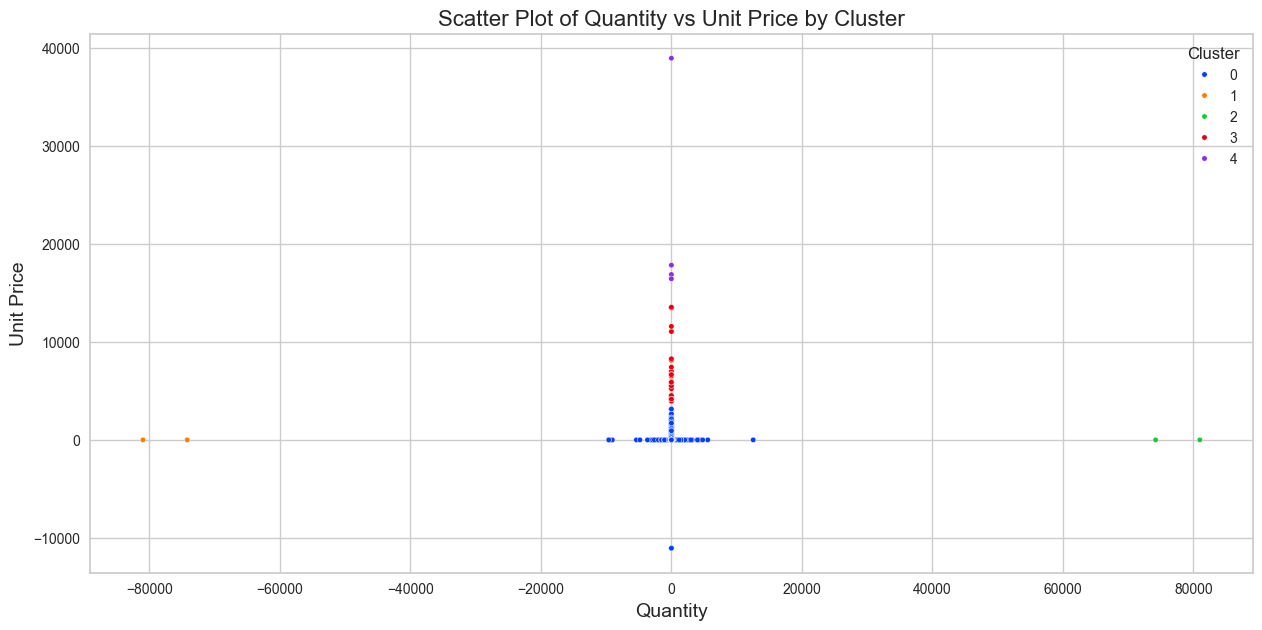

In [204]:
# Create a scatter plot with a limited bright color palette
plt.figure(figsize=(15, 7))

# Get the number of unique clusters
num_clusters = ravi['Cluster'].nunique()

# Create the scatter plot
sns.scatterplot(data=ravi, x='Quantity', y='UnitPrice', hue='Cluster', s=15, palette=sns.color_palette("bright", num_clusters))

# Add title and labels
plt.title('Scatter Plot of Quantity vs Unit Price by Cluster', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Unit Price', fontsize=14)

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [205]:
kmeans.inertia_

2954337070.015175

Elbow Method to decide how many Clusters to chose! It is difficult to predict the right number of clusters that we should opt for We can do this Elbow method to get the right number of clusters After performing this we might add or reduce the number of clusters based on how much error we are reducing by increasing the clusters!

In [207]:
# Identify datetime columns
datetime_cols = ravi.select_dtypes(include=['datetime64']).columns
print("Datetime columns:", datetime_cols)

# Convert datetime columns to numerical features
for col in datetime_cols:
    ravi[col + '_year'] = ravi[col].dt.year
    ravi[col + '_month'] = ravi[col].dt.month
    ravi[col + '_day'] = ravi[col].dt.day
    ravi[col + '_weekday'] = ravi[col].dt.weekday

# Drop original datetime columns
ravi_cleaned = ravi.drop(columns=datetime_cols, errors='ignore')

# Keep only numeric data
ravi_cleaned = ravi_cleaned.select_dtypes(include=[np.number])

print("Cleaned dataset ready for K-Means.")

Datetime columns: Index(['InvoiceDate'], dtype='object')
Cleaned dataset ready for K-Means.


In [208]:
print(ravi_cleaned.isnull().sum())
ravi_cleaned = ravi_cleaned.dropna()

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")  # You can also use "median" or "most_frequent"
ravi_cleaned = pd.DataFrame(imputer.fit_transform(ravi_cleaned), columns=ravi_cleaned.columns)

Quantity                    0
UnitPrice                   0
CustomerID             135080
Cluster                     0
InvoiceDate_year            0
InvoiceDate_month           0
InvoiceDate_day             0
InvoiceDate_weekday         0
dtype: int64


In [209]:
error_rate_ravi = []
for clusters in range(1, 16):
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    kmeans.fit(ravi_cleaned)
    error_rate_ravi.append(kmeans.inertia_)

In [210]:
print(error_rate_ravi)

error_rate_ravi = []
for clusters in range(1, 16):
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    kmeans.fit(ravi_cleaned)  # Using the correct dataset
    error_rate_ravi.append(kmeans.inertia_)

print(error_rate_ravi)

[1221773366213.1138, 330417917502.18054, 159537912277.50446, 98601119974.5892, 72526994926.32217, 60486011936.14531, 45747522406.65446, 39658686823.77249, 27618135291.978172, 22877390308.57177, 17326809972.74703, 15247471760.900452, 12182869443.839447, 10676435672.201769, 9409199137.814741]
[1221773366213.1138, 330417917502.18054, 159537912277.50443, 98601119974.5892, 72526994926.32217, 60486011936.14531, 45747522406.65446, 39658686823.7725, 27618135291.97817, 22877390308.57177, 17326809972.747032, 15247471760.90045, 12182869443.83945, 10676435672.201769, 9409199137.814743]


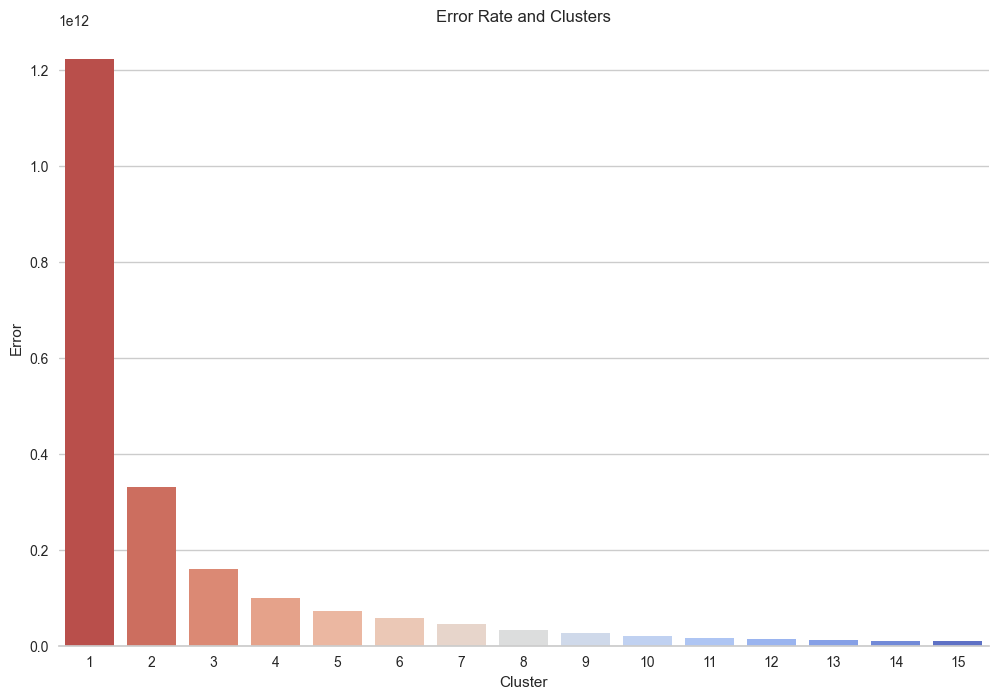

In [211]:
# Ensure ravi_cleaned exists
if 'ravi_cleaned' not in globals():
    print("Error: 'ravi_cleaned' is not defined. Make sure you preprocessed the data correctly!")
else:
    # Create error_rate_ravi list
    error_rate_ravi = []

    # Run K-Means for clusters from 1 to 15
    for clusters in range(1, 16):
        kmeans = KMeans(n_clusters=clusters, random_state=42, n_init=10)
        kmeans.fit(ravi_cleaned)
        error_rate_ravi.append(kmeans.inertia_)

    # Create DataFrame
    error_df = pd.DataFrame({"Cluster": range(1, 16), "Error": error_rate_ravi})

    # Plot the error rates
    plt.figure(figsize=(12, 8))
    p = sns.barplot(x="Cluster", y="Error", data=error_df, palette="coolwarm_r")
    sns.despine(left=True)
    p.set_title("Error Rate and Clusters")
    plt.show()

In [212]:
# Load the dataset
ravi = pd.read_excel('Online Retail.xlsx')

# Display basic info
print(ravi.info())  
print(ravi.head())  

# Check if 'Country' exists
print("Columns:", ravi.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    

In [213]:
# Drop rows where 'Country' is missing
ravi = ravi.dropna(subset=['Country'])

# Convert 'InvoiceDate' with correct format
ravi['InvoiceDate'] = pd.to_datetime(ravi['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')

# Check if conversion worked
print(ravi[['InvoiceDate']].head())
print(ravi['InvoiceDate'].isnull().sum(), "dates couldn't be converted.")

          InvoiceDate
0 2010-12-01 08:26:00
1 2010-12-01 08:26:00
2 2010-12-01 08:26:00
3 2010-12-01 08:26:00
4 2010-12-01 08:26:00
0 dates couldn't be converted.


In [214]:
country_sales = ravi.groupby('Country')['Quantity'].sum()
print(country_sales.sort_values(ascending=False))  # Show top-selling countries

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


In [215]:
ravi['Revenue'] = ravi['Quantity'] * ravi['UnitPrice']
country_revenue = ravi.groupby('Country')['Revenue'].sum()
print(country_revenue.sort_values(ascending=False))

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

In [216]:
# Ensure Revenue column exists
ravi['Revenue'] = ravi['Quantity'] * ravi['UnitPrice']

# Group data by country
country_wise = ravi.groupby('Country', as_index=False).agg({'Revenue': 'sum'})

# Display DataFrame
print(country_wise.head())  

     Country    Revenue
0  Australia  137077.27
1    Austria   10154.32
2    Bahrain     548.40
3    Belgium   40910.96
4     Brazil    1143.60


In [217]:
!pip install pycountry
import pycountry  # Import the missing module
import pycountry
# Function to convert country name to ISO-3 code
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None  # Return None if country not found

# Apply function to get ISO-3 codes
country_wise['ISO-3'] = country_wise['Country'].apply(get_iso3)

# Remove rows where ISO-3 code is missing
country_wise = country_wise.dropna(subset=['ISO-3'])

print(country_wise.head())  # Check if ISO-3 codes exist

     Country    Revenue ISO-3
0  Australia  137077.27   AUS
1    Austria   10154.32   AUT
2    Bahrain     548.40   BHR
3    Belgium   40910.96   BEL
4     Brazil    1143.60   BRA


### **Countries According to Revenue**

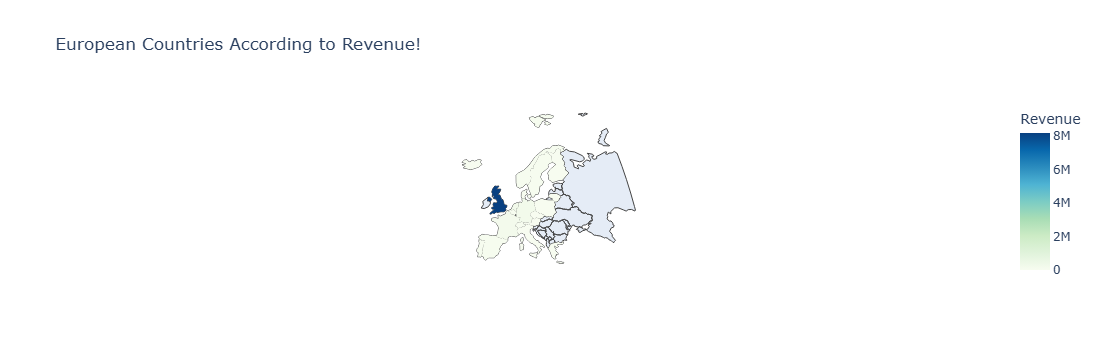

In [218]:
import plotly.graph_objects as go
from plotly.offline import iplot

data = dict(
    type='choropleth',
    colorscale='GnBu',
    locations=country_wise['ISO-3'],  # Use the correct ISO-3 codes
    locationmode='ISO-3',
    z=country_wise['Revenue'],  # Use the correct revenue column
    text=country_wise['Country'],
    colorbar={'title': 'Revenue'},
    marker=dict(line=dict(width=0))
)

layout = dict(
    title='European Countries According to Revenue!',
    geo=dict(scope='europe', showlakes=False, projection={'type': 'winkel tripel'})
)

# Create and display the map
Choromaps2 = go.Figure(data=[data], layout=layout)
iplot(Choromaps2)

Index(['Country', 'Revenue', 'ISO-3'], dtype='object')


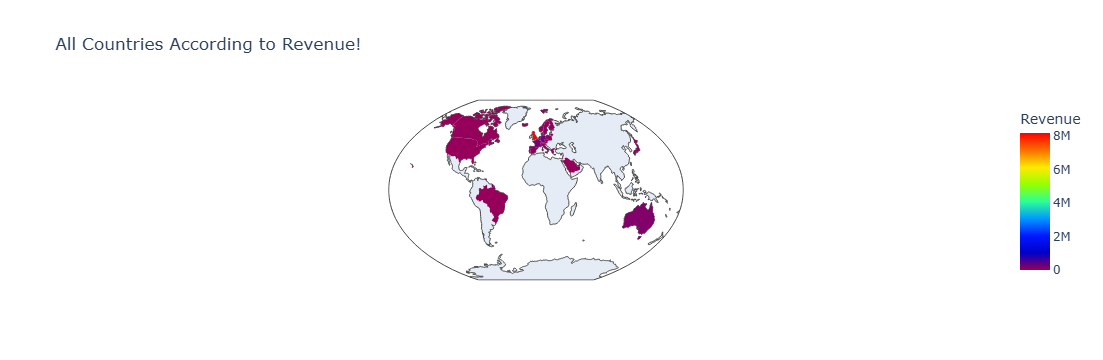

In [219]:
import plotly.graph_objects as go
from plotly.offline import iplot

# Check correct column names
print(country_wise.columns)  

data = dict(
    type='choropleth',
    colorscale='rainbow',
    locations=country_wise['ISO-3'],  # Ensure this column exists
    locationmode='ISO-3',
    z=country_wise['Revenue'],  # Use correct column name
    text=country_wise['Country'],
    colorbar={'title': 'Revenue'},
    marker=dict(line=dict(width=0))
)

layout = dict(
    title='All Countries According to Revenue!',
    geo=dict(scope='world', showlakes=False, projection={'type': 'winkel tripel'})
)

Choromaps2 = go.Figure(data=[data], layout=layout)
iplot(Choromaps2)